<a href="https://colab.research.google.com/github/TahmidaMajumder/TCV_Project/blob/main/Final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Import Libraries

In [3]:
import os
import h5py
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import h5py

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# Preprocessing

In [4]:
def preprocess_medium(hdf5_path):
    # Load data
    with h5py.File(hdf5_path, 'r') as file:
        images = np.array(file['images'])
        labels = np.array(file['labels'])

    processed_images = []
    for image in images:
        # Resize for consistency
        image = cv2.resize(image, (256, 256))

        # Denoise with bilateral filter
        denoised = cv2.bilateralFilter(image, 9, 75, 75)

        # Convert to HSV for color enhancement
        hsv = cv2.cvtColor(denoised, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)

        # Enhance saturation
        s = cv2.add(s, 30)

        # Enhance value channel with CLAHE
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        v = clahe.apply(v)

        # Merge and convert back
        enhanced_hsv = cv2.merge([h, s, v])
        result = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2BGR)

        # Apply sharpening
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        sharpened = cv2.filter2D(result, -1, kernel)

        processed_images.append(sharpened.flatten())

    # Convert to numpy array and standardize
    processed_images = np.array(processed_images)
    scaler = StandardScaler()
    images_scaled = scaler.fit_transform(processed_images)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        images_scaled, labels,
        test_size=0.25,
        shuffle=True,
        stratify=labels,
        random_state=42
    )

    return X_train, X_test, y_train, y_test, scaler

In [5]:
path = '/content/drive/MyDrive/TCV_Project/dataset.hdf5'

In [6]:
# Load and preprocess data
X_train, X_test, y_train, y_test,scaler = preprocess_medium(path)

# PCA Training

In [9]:
# Apply PCA
n_components = 70
pca_c2 = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)


pca_c2.fit(X_train, y_train)
X_train_pca_2 = pca_c2.transform(X_train)
X_test_pca_2 = pca_c2.transform(X_test)

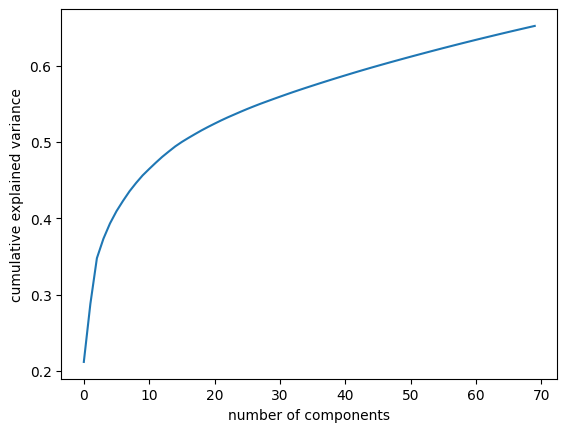

In [10]:
plt.plot(np.cumsum(pca_c2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

# SVM Training

In [11]:
# With Standard Function PCA
svc_classifier_pca_2 = SVC()
svc_classifier_pca_2.fit(X_train_pca_2, y_train)
y_pred_pca_svc = svc_classifier_pca_2.predict(X_test_pca_2)

print("With Standard Function PCA(SVC)")
print(classification_report(y_test, y_pred_pca_svc, zero_division=1))

With Standard Function PCA(SVC)
                      precision    recall  f1-score   support

            b'Mixed'       1.00      0.00      0.00         4
          b'Partial'       0.83      0.71      0.76        34
              b'Raw'       0.91      0.91      0.91       188
             b'Ripe'       0.82      0.92      0.87       127
b'Rotten_or_Bruised'       0.73      0.58      0.65        38

            accuracy                           0.86       391
           macro avg       0.86      0.62      0.64       391
        weighted avg       0.86      0.86      0.85       391



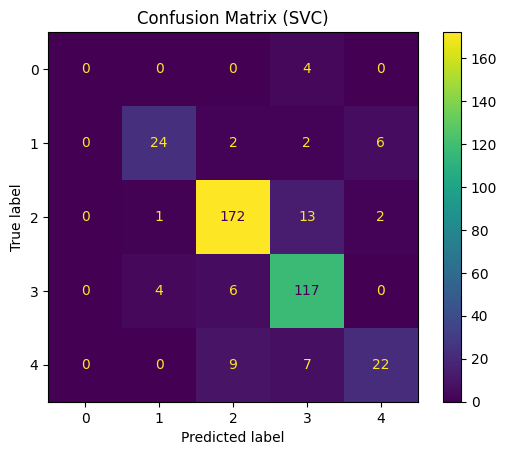

In [12]:
cm = confusion_matrix(y_test, y_pred_pca_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (SVC)")
plt.savefig("Confusion Matrix(SVC).jpg") # Save the plot
plt.show()

# KNN Training

In [13]:
# With Standard Function PCA
knn_classifier_pca_2 = KNeighborsClassifier(n_neighbors=5)
knn_classifier_pca_2.fit(X_train_pca_2, y_train)
y_pred_knn_pca_2 = knn_classifier_pca_2.predict(X_test_pca_2)

print("KNN Classification Report: pca_std")
print(classification_report(y_test, y_pred_knn_pca_2, zero_division=1))

KNN Classification Report: pca_std
                      precision    recall  f1-score   support

            b'Mixed'       1.00      0.00      0.00         4
          b'Partial'       0.47      0.79      0.59        34
              b'Raw'       0.79      0.89      0.83       188
             b'Ripe'       0.85      0.65      0.74       127
b'Rotten_or_Bruised'       0.70      0.42      0.52        38

            accuracy                           0.75       391
           macro avg       0.76      0.55      0.54       391
        weighted avg       0.77      0.75      0.74       391



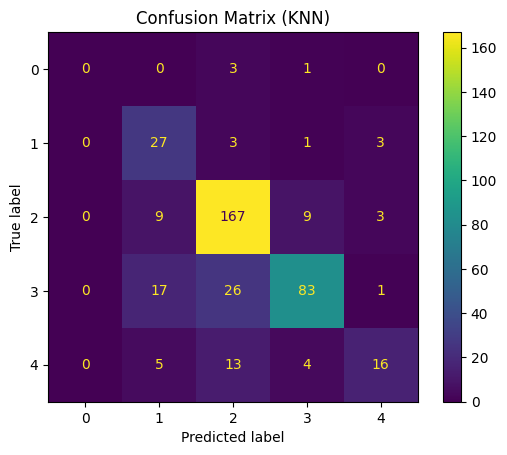

In [14]:
cm = confusion_matrix(y_test, y_pred_knn_pca_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (KNN)")
plt.savefig("Confusion Matrix(KNN).jpg") # Save the plot
plt.show()

# XGBoost Training

In [15]:
# With Standard Function PCA
xgboost_classifier_pca_2 = GradientBoostingClassifier()
xgboost_classifier_pca_2.fit(X_train_pca_2, y_train)
y_pred_xgboost_pca_2 = xgboost_classifier_pca_2.predict(X_test_pca_2)

print("XGBoost Classification Report: pca_std")
print(classification_report(y_test, y_pred_xgboost_pca_2, zero_division=1))

XGBoost Classification Report: pca_std
                      precision    recall  f1-score   support

            b'Mixed'       0.00      0.00      0.00         4
          b'Partial'       0.83      0.59      0.69        34
              b'Raw'       0.90      0.95      0.93       188
             b'Ripe'       0.85      0.91      0.87       127
b'Rotten_or_Bruised'       0.74      0.61      0.67        38

            accuracy                           0.86       391
           macro avg       0.66      0.61      0.63       391
        weighted avg       0.85      0.86      0.85       391



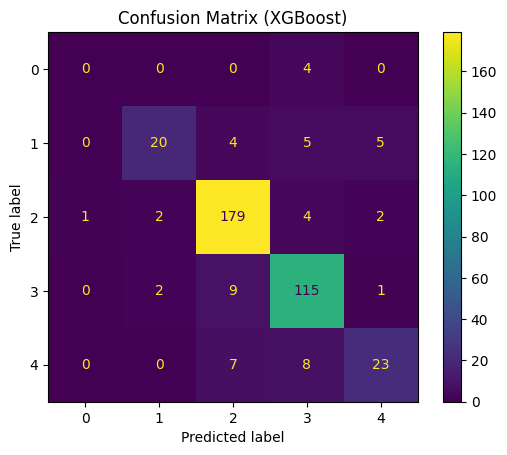

In [16]:
cm = confusion_matrix(y_test, y_pred_xgboost_pca_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (XGBoost)")
plt.savefig("Confusion Matrix(XGBoost).jpg") # Save the plot
plt.show()

# Test The Best Model So Far

In [17]:
def preprocess_single_image(image_path, scaler):

    image = cv2.imread(image_path)

    image = cv2.resize(image, (256, 256))

    # Denoise with bilateral filter
    denoised = cv2.bilateralFilter(image, 9, 75, 75)

    # Convert to HSV for color enhancement
    hsv = cv2.cvtColor(denoised, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    # Enhance saturation
    s = cv2.add(s, 30)

    # Enhance value channel with CLAHE
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    v = clahe.apply(v)

    # Merge and convert back
    enhanced_hsv = cv2.merge([h, s, v])
    result = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2BGR)

    # Apply sharpening
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpened = cv2.filter2D(result, -1, kernel)

    # Flatten and standardize
    processed_image = sharpened.flatten()
    processed_image = scaler.transform([processed_image])

    return processed_image


In [18]:
def predict_image_level(image_path, pca_model, svc_model, scaler):
    """
    Predicts the class of a single image using a trained PCA and SVC model.
    """
    try:
        # Preprocess the image
        preprocessed_image = preprocess_single_image(image_path, scaler)
        if preprocessed_image is None:
            return None

        # Apply PCA transformation
        pca_image = pca_model.transform(preprocessed_image)

        # Predict using the SVC model
        predicted_class = svc_model.predict(pca_image)

        return predicted_class[0]

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [25]:
# Example usage
image_path = '/content/Ripe_Test.jpg'  # Replace with your image path

predicted_level = predict_image_level(image_path, pca_c2, svc_classifier_pca_2,scaler)

if predicted_level is not None:
    print(f"The predicted level for the image is: {predicted_level}")

The predicted level for the image is: b'Ripe'


In [26]:
# Example usage
image_path = '/content/Mixed_Test.jpg'  # Replace with your image path

predicted_level = predict_image_level(image_path, pca_c2, svc_classifier_pca_2,scaler)

if predicted_level is not None:
    print(f"The predicted level for the image is: {predicted_level}")

The predicted level for the image is: b'Mixed'


In [27]:
# Example usage
image_path = '/content/Rotten_Test.jpg'  # Replace with your image path

predicted_level = predict_image_level(image_path, pca_c2, svc_classifier_pca_2,scaler)

if predicted_level is not None:
    print(f"The predicted level for the image is: {predicted_level}")

The predicted level for the image is: b'Rotten_or_Bruised'


In [28]:
# Example usage
image_path = '/content/Raw_Test.jpg'  # Replace with your image path

predicted_level = predict_image_level(image_path, pca_c2, svc_classifier_pca_2,scaler)

if predicted_level is not None:
    print(f"The predicted level for the image is: {predicted_level}")

The predicted level for the image is: b'Raw'


In [29]:
# Example usage
image_path = '/content/Partial_Test.jpg'  # Replace with your image path

predicted_level = predict_image_level(image_path, pca_c2, svc_classifier_pca_2,scaler)

if predicted_level is not None:
    print(f"The predicted level for the image is: {predicted_level}")

The predicted level for the image is: b'Ripe'


# Import The model

In [30]:
import joblib
import pickle

# Save the scikit-learn model

pickle.dump(pca_c2, open('Image_Classifier_pca_c2.pkl','wb'))
pickle.dump(svc_classifier_pca_2, open('Image_Classifier_SVC_2.pkl','wb'))
pickle.dump(knn_classifier_pca_2, open('Image_Classifier_KNN_2.pkl','wb'))
pickle.dump(xgboost_classifier_pca_2, open('Image_Classifier_XGBoost_2.pkl','wb'))

In [31]:
# Save Function

pickle.dump(scaler, open('scaler_2.pkl', 'wb'))
pickle.dump(preprocess_single_image, open('preprocess_single_image_2.pkl', 'wb'))